In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import calendar
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
pd.set_option('display.float_format', lambda x: '%.6f' % x)


In [2]:
#Load all Files
data_load = {
    'air_reserve': pd.read_csv('./input/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime']), 
    'hpg_reserve': pd.read_csv('./input/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime']), 
    'air_store': pd.read_csv('./input/air_store_info.csv'),
    'hpg_store': pd.read_csv('./input/hpg_store_info.csv'),
    'air_visit': pd.read_csv('./input/air_visit_data.csv',parse_dates=['visit_date']),
    'store_id': pd.read_csv('./input/store_id_relation.csv'),
    'sample_sub': pd.read_csv('./input/sample_submission.csv'),
    'holiday_dates': pd.read_csv('./input/date_info.csv',parse_dates=['calendar_date']).rename(columns={'calendar_date':'visit_date'})
    }

In [3]:
data_load['air_reserve'].head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [4]:
data_load['hpg_reserve'].head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [5]:
data_load['air_store'].describe(include = ['O'])

,air_store_id,air_genre_name,air_area_name
count,829,829,829
unique,829,14,103
top,air_bf21b8350771879b,Izakaya,Fukuoka-ken Fukuoka-shi Daimyō
freq,1,197,64


In [6]:
data_load['hpg_store'].describe(include = ['O'])

,hpg_store_id,hpg_genre_name,hpg_area_name
count,4690,4690,4690
unique,4690,34,119
top,hpg_28fe85f238c2cd3c,Japanese style,Tōkyō-to Shinjuku-ku None
freq,1,1750,257


In [7]:
data_load['air_visit'].head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [8]:
data_load['holiday_dates'].head(5)

,visit_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [9]:
data_load['sample_sub'].head(1)

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0


In [10]:
# Removing concat from air id and date
data_load['sample_sub']['air_store_id'] = data_load['sample_sub']['id'].apply(lambda x: '_'.join(x.split('_')[:2]))
data_load['sample_sub']['visit_date'] = data_load['sample_sub']['id'].apply(lambda x: x.split('_')[-1])

In [11]:
data_load['sample_sub'].head(1)

,id,visitors,air_store_id,visit_date
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9,2017-04-23


In [12]:
#Visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
from datetime import datetime

In [13]:
#Visitor each day
plt1 = data_load['air_visit'].groupby(['visit_date'], as_index=False).agg({'visitors': np.sum})

Text(0.5,1,u'Visitor each day')

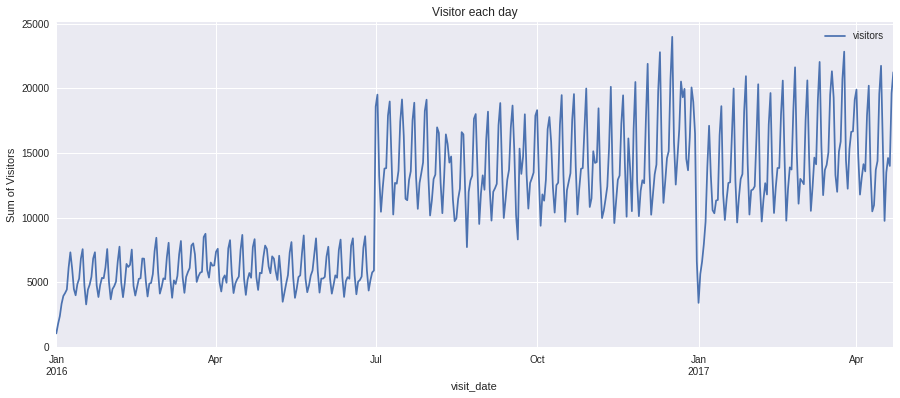

In [14]:
plt1=plt1.set_index('visit_date')
plt1.plot(figsize=(15, 6))
plt.ylabel("Sum of Visitors")
plt.title("Visitor each day")

Text(0.5,0,u'Number of People in a visit')

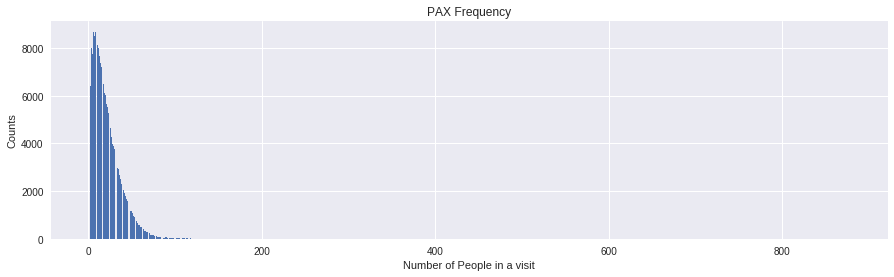

In [15]:
# Pax Frequency: Count of visit with 'x' visitor
plt2=data_load['air_visit']['visitors'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots()
ax.bar(plt2['index'] ,plt2['visitors'])
fig.set_size_inches(15,4, forward=True)
ax.set_title("PAX Frequency")
ax.set_ylabel('Counts')
ax.set_xlabel('Number of People in a visit')

In [16]:
#Median number of visitor in day of a week
data_load['air_visit']['dow']=data_load['air_visit']['visit_date'].apply(lambda x: calendar.day_name[x.weekday()])
plt3 = data_load['air_visit'].groupby(['dow'], as_index=False).agg({'visitors': np.median})
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
mapping = {day: i for i, day in enumerate(days)}
key = plt3['dow'].map(mapping)
plt3 = plt3.iloc[key.argsort()].set_index('dow').reset_index()

#Median number of visitor in Month of a Year
data_load['air_visit']['Month']=data_load['air_visit']['visit_date'].apply(lambda x: calendar.month_name[x.month])
plt4 = data_load['air_visit'].groupby(['Month'], as_index=False).agg({'visitors': np.median})
Months = ['January','February','March','April','May','June','July','August','September','October','November','December']
mapping = {Month: i for i, Month in enumerate(Months)}
key = plt4['Month'].map(mapping)
plt4 = plt4.iloc[key.argsort()].set_index('Month').reset_index()

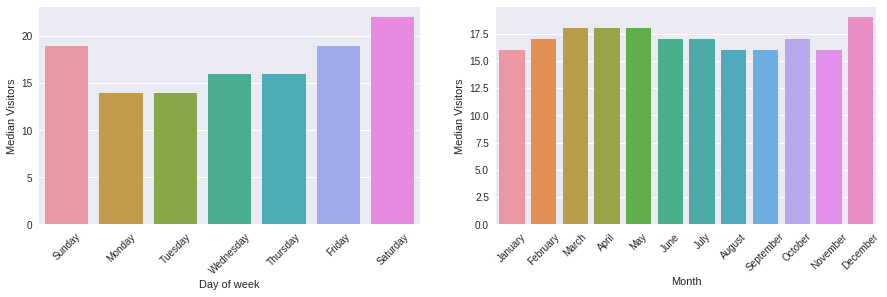

In [17]:
#plot
fig, ax =plt.subplots(1,2)
fig.set_size_inches(15,4, forward=True)

sns.barplot(x="dow",y="visitors",data=plt3,ax=ax[0])
sns.barplot(x="Month",y="visitors",data=plt4,ax=ax[1])
ax[0].set_xlabel('Day of week')
ax[0].set_ylabel('Median Visitors')
ax[1].set_ylabel('Median Visitors')
for ax in ax:
    for label in ax.get_xticklabels():
        label.set_rotation(45) 

Text(0.5,1,u'Visitor each day')

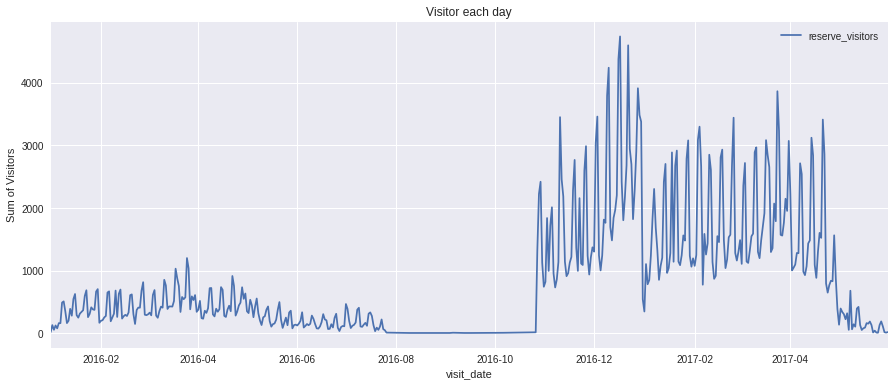

In [18]:
# Compare Reservation data to Visitor data
#Visitor each day
data_load['air_reserve']['visit_date']=data_load['air_reserve']['visit_datetime'].apply(lambda x: x.date())
data_load['air_reserve']['reserve_date']=data_load['air_reserve']['reserve_datetime'].apply(lambda x: x.date())
airR1 = data_load['air_reserve'].groupby(['visit_date'], as_index=False).agg({'reserve_visitors': np.sum})
airR1=airR1.set_index('visit_date')
airR1.plot(figsize=(15, 6))
plt.ylabel("Sum of Visitors")
plt.title("Visitor each day")

In [19]:
data_load['air_reserve']['visit_hr']=data_load['air_reserve']['visit_datetime'].apply(lambda x: x.time().hour)
data_load['air_reserve']['reserve_hr']=data_load['air_reserve']['reserve_datetime'].apply(lambda x: x.time().hour)
data_load['air_reserve']['diff_hr']=(data_load['air_reserve']['visit_datetime']-data_load['air_reserve']['reserve_datetime']).apply(lambda x : x.total_seconds()/3600)
airR2 = data_load['air_reserve'].groupby(['visit_hr'], as_index=False).agg({'reserve_visitors': np.sum})
airR3 = data_load['air_reserve'].groupby(['diff_hr'], as_index=False).agg({'reserve_visitors': np.sum})

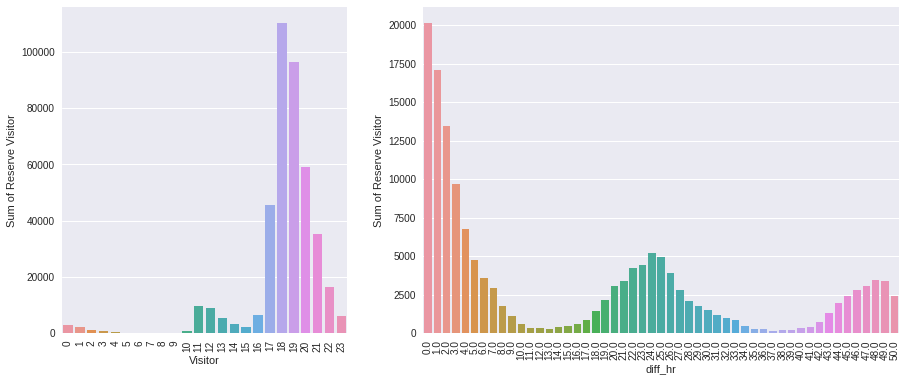

In [20]:
#plot
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 2.5]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
sns.barplot(x="visit_hr",y="reserve_visitors",data=airR2,ax=ax0)
sns.barplot(x="diff_hr",y="reserve_visitors",data=airR3[(airR3['diff_hr'] <= 50)],ax=ax1)
ax0.set_xlabel('Visitor')
ax0.set_ylabel('Sum of Reserve Visitor')
ax1.set_ylabel('Sum of Reserve Visitor')
for ax in [ax0,ax1]:
    for label in ax.get_xticklabels():
        label.set_rotation(90) 

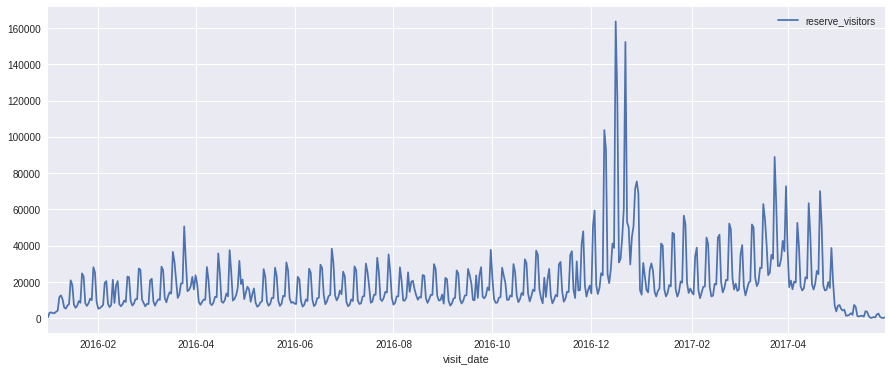

In [21]:
# Compare Reservation data to Visitor data
#Visitor each day
data_load['hpg_reserve']['visit_date']=data_load['hpg_reserve']['visit_datetime'].apply(lambda x: x.date())
data_load['hpg_reserve']['reserve_date']=data_load['hpg_reserve']['reserve_datetime'].apply(lambda x: x.date())
hpgR1 = data_load['hpg_reserve'].groupby(['visit_date'], as_index=False).agg({'reserve_visitors': np.sum})
hpgR1=hpgR1.set_index('visit_date')
hpgR1.plot(figsize=(15, 6))

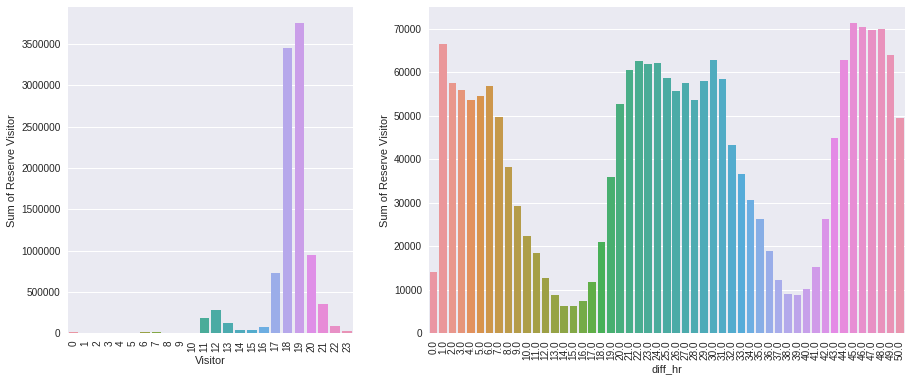

In [22]:
data_load['hpg_reserve']['visit_hr']=data_load['hpg_reserve']['visit_datetime'].apply(lambda x: x.time().hour)
data_load['hpg_reserve']['reserve_hr']=data_load['hpg_reserve']['reserve_datetime'].apply(lambda x: x.time().hour)
data_load['hpg_reserve']['diff_hr']=(data_load['hpg_reserve']['visit_datetime']-data_load['hpg_reserve']['reserve_datetime']).apply(lambda x : x.total_seconds()/3600)
hpgR2 = data_load['hpg_reserve'].groupby(['visit_hr'], as_index=False).agg({'reserve_visitors': np.sum})
hpgR3 = data_load['hpg_reserve'].groupby(['diff_hr'], as_index=False).agg({'reserve_visitors': np.sum})
#plot
fig = plt.figure(figsize=(15, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 2.5]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
sns.barplot(x="visit_hr",y="reserve_visitors",data=hpgR2,ax=ax0)
sns.barplot(x="diff_hr",y="reserve_visitors",data=hpgR3[(hpgR3['diff_hr'] <= 50)],ax=ax1)
ax0.set_xlabel('Visitor')
ax0.set_ylabel('Sum of Reserve Visitor')
ax1.set_ylabel('Sum of Reserve Visitor')
for ax in [ax0,ax1]:
    for label in ax.get_xticklabels():
        label.set_rotation(90) 

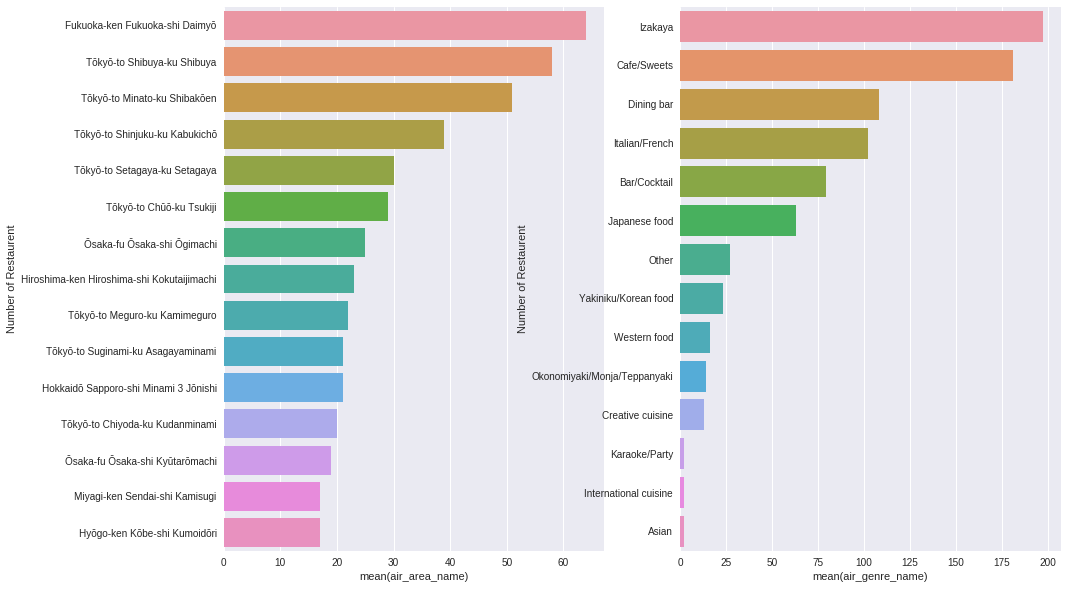

In [23]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

# Number of restaurent in area: Air Data
airS1=data_load['air_store']['air_area_name'].value_counts().reset_index().sort_index()
airS2=data_load['air_store']['air_genre_name'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots(1,2)
sns.barplot(y='index' ,x='air_area_name',data=airS1.iloc[:15],ax=ax[0])
sns.barplot(y='index' ,x='air_genre_name',data=airS2.iloc[:15],ax=ax[1])
fig.set_size_inches(15,10, forward=True)
ax[0].set_ylabel('Number of Restaurent')
ax[1].set_ylabel('Number of Restaurent')

Text(0,0.5,u'Number of Restaurent')

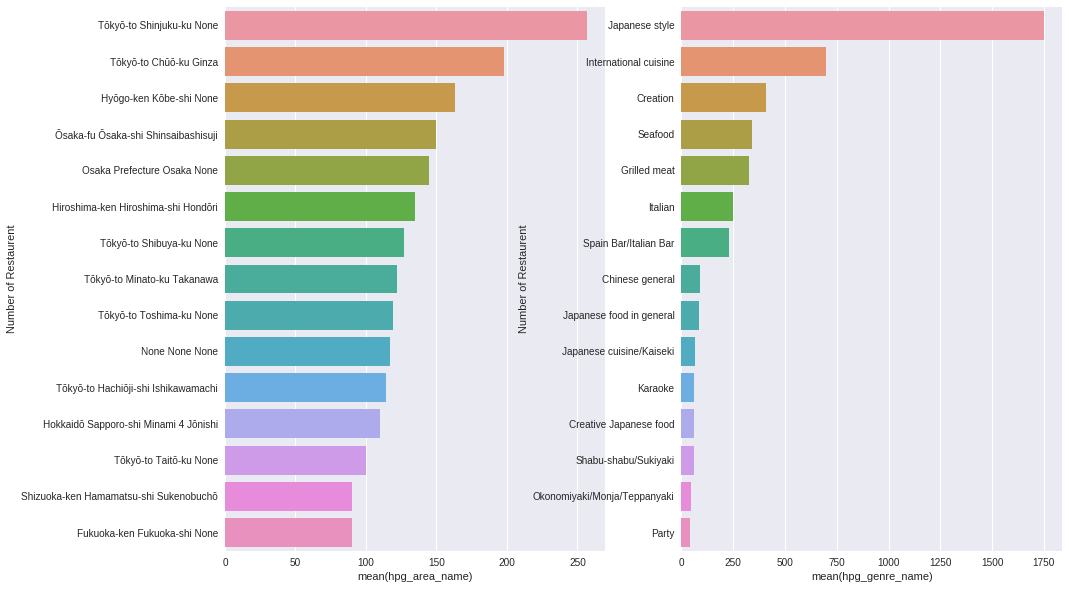

In [24]:
# Number of restaurent in area: HPG store
hpgS1=data_load['hpg_store']['hpg_area_name'].value_counts().reset_index().sort_index()
hpgS2=data_load['hpg_store']['hpg_genre_name'].value_counts().reset_index().sort_index()
fig,ax = plt.subplots(1,2)
sns.barplot(y='index' ,x='hpg_area_name',data=hpgS1.iloc[:15],ax=ax[0])
sns.barplot(y='index' ,x='hpg_genre_name',data=hpgS2.iloc[:15],ax=ax[1])
fig.set_size_inches(15,10, forward=True)
ax[0].set_ylabel('Number of Restaurent')
ax[1].set_ylabel('Number of Restaurent')

In [25]:
data_load['air_reserve'].count()


air_store_id        92378
visit_datetime      92378
reserve_datetime    92378
reserve_visitors    92378
visit_date          92378
reserve_date        92378
visit_hr            92378
reserve_hr          92378
diff_hr             92378
dtype: int64

In [26]:
data_load['store_id'].count()

air_store_id    150
hpg_store_id    150
dtype: int64

In [27]:
data_load['hpg_store'].merge(data_load['air_store'], on = ['longitude'], how = 'inner')

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_x,longitude,air_store_id,air_genre_name,air_area_name,latitude_y


In [28]:
np.unique(data_load['hpg_store']['latitude']>=35.658068)
#data_load['air_store']

array([False,  True], dtype=bool)

In [59]:
import sqlite3
conn = sqlite3.connect('example.db')

c = conn.cursor()